# **CIS 520: Machine Learning, Fall 2022**

## **Boosting**


- **Content Creators:** Edward Li
- **Content Reviewer:** Jasleen Dhanoa
- **Acknowledgements:** This notebook contains an excerpt from [Hands-on Machine Learning with Scikit-Learn and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/) by Aurélien Géron. The content is available on [Github](https://github.com/ageron/handson-ml).


- **Objectives:** The objective of this notebook is:
  - Walk you through examples of AdaBoost, Gradient Boost and XGBoost
  - Understand the over-fitting and learn how to prevent over-fitting
  - and compare their performance on MNIST dataset.

## **Autograding and the PennGrader**

First, you'll need to set up the PennGrader, which we'll be using throughout the semester to help you with your homeworks and worksheeets.

PennGrader is not only **awesome**, but it was built by an equally awesome person: Leo Murri.  Today, Leo works as a data scientist at Amazon!

PennGrader was developed to provide students with *instant* feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database.

### Imports and Setup (Do Not Modify This Section)

In [1]:
%%capture
!pip install penngrader


In [2]:
import random 
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
np.random.seed(42)  # don't change this line

import dill
import base64

In [3]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


### Insert PennID here!

In [4]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 57931095 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [5]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_Boosting_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [6]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

## Setup

Import part of the packages and data we used in this notebook. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [8]:
# import MNIST from sklearn
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [9]:
# split the MNIST data into train, valiation and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

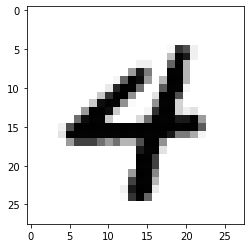

In [10]:
# visualize the first element in X_train
plt.imshow(X_train.to_numpy()[0].reshape(28,28), cmap='Greys')
plt.show()

In [11]:
y_train.to_numpy()[0]

4

## **AdaBoost**

The first boosting algorithm we will go through is **AdaBoost**. You can see the [sklearn documentation of AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). The code below shows how we initiate a simple AdaBoost classifier and train it on our MNIST dataset. 

In [12]:
# create an AdaBoost classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

Calculate your Training Accuracy score by calling your ada_clf classifier's "score" method.

In [17]:
# calculate the accuracy score on train set. Round your answer to the HUNDREDTHS place.

training_accuracy = np.round(ada_clf.score(X_train, y_train), 2)
print(training_accuracy)

0.79


In [18]:
grader.grade(test_case_id = 'test_case_adaboost_train', answer = training_accuracy)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, calculate your Test Accuracy score. 

Hint: First use your ada_clf classifier's "predict" method to get out your predicted labels. Then call accuracy_score() to compare the y_test labels and your predictions. 

In [23]:
# calculate the accuracy score on test set

y_pred = ada_clf.predict(X_test)
test_accuracy = np.round(accuracy_score(y_pred, y_test), 2)
print(test_accuracy)

0.79


In [24]:
grader.grade(test_case_id = 'test_case_adaboost_test', answer = test_accuracy)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


We find the accuracies on the train set and test set are quite close in the above example. Therefore, it's quite fair for us to say, there is no over-fitting problem. 

### Hyper-parameter tuning

The hyper-parameters we try here are not optimal. You could tune it by yourself to see the effect of different hyper-parameters. Below is an example code of how we tune max_depth.

Please notice that it is quite **time-consuming** to run below cell. If you want to run this code by yourself, you could choose depths = [1,3,5] instead of [1,3,5,8] to accelerate the process.

In [25]:
# create a list of all possible depth values
depths = [1,3,5,8]
models = []
train_accuracy = []
val_accuracy = []
# create a list of models 
for depth in depths:
  model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=depth), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
  model.fit(X_train, y_train)
  models.append(model)

  # TODO: evaluate model performance
  train_score = model.score(X_train, y_train)
  val_score = model.score(X_val, y_val)
  
  train_accuracy.append(train_score)
  val_accuracy.append(val_score)
  print('Depth: {} Train Accuracy: {} Test Accuracy: {}'.format(depth, train_score, val_score))

Depth: 1 Train Accuracy: 0.79236 Test Accuracy: 0.7883
Depth: 3 Train Accuracy: 0.89628 Test Accuracy: 0.8902
Depth: 5 Train Accuracy: 0.93228 Test Accuracy: 0.8996
Depth: 8 Train Accuracy: 0.99362 Test Accuracy: 0.9449


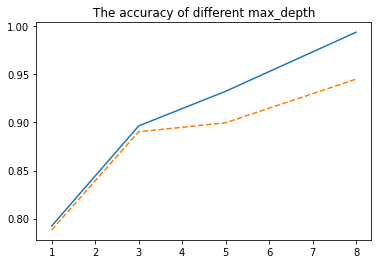

In [26]:
# plot the train and test accuracy
plt.plot(depths, train_accuracy, '-')
plt.plot(depths, val_accuracy, '--')
plt.title('The accuracy of different max_depth')
plt.show()

## *Question 1*

According to this figure, which one is the optimal max_depth? Why?

From the above figure,  we can observe that as the `max_depth` gets larger, there is an obvious gap between performance on the validation set and training set. What kind of method can we use to prevent over-fitting? 

*Hint: Many hyper-parameters could control model complexity*

In [27]:
# What is the optimal max_depth hyperparameter? Answer as an integer.
opt_depth = 8

In [28]:
grader.grade(test_case_id = 'test_case_opt_depth', answer = opt_depth)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Once you get the optimal depth, you could calculate model performance on the test set using the optimal model we found in the previous step.

In [32]:
best_model = models[np.argmax(val_accuracy)]

# Now recalculate the test accuracy on this best model. Round to the HUNDREDTHS place.

y_pred = model.predict(X_test)
best_score = np.round(accuracy_score(y_pred, y_test), 2)

In [33]:
grader.grade(test_case_id = 'test_case_adaboost_best', answer = best_score)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Another very powerful property of tree-based algorithms is that it is more **explainable** compared with other algorithms. We can display feature importance using the following syntax:

In [34]:
models[0].feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

## **Gradient Boosting**

Gradient Boosting is another powerful boosting algorithm. To learn more about the difference between AdaBoost and Gradient Boost, refer to the [lecture slide](https://www.seas.upenn.edu/~cis520/lectures/12_boosting.pdf).
Here is the [sklearn documentation of Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [35]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3,
                           random_state=42)

Report the test accuracy on this model

In [36]:
# Report the test accuracy to the HUNDREDTHS place. Be sure to predict the test set labels first!

y_pred = gbrt.predict(X_test)
gb_test_acc = np.round(accuracy_score(y_pred, y_test), 2)

In [37]:
grader.grade(test_case_id = 'test_case_gb_best', answer = gb_test_acc)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### Gradient Boosting with Early Stopping

**Early stopping** is one of the important methods we use to prevent over-fitting. Below is the example code of how we perform Gradient Boosting with early stopping.

In [38]:
gbrt = GradientBoostingClassifier(max_depth=2, subsample = 0.5, tol = 0.01, n_estimators=10, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=10, random_state=42,
                           subsample=0.5, tol=0.01)

In [43]:
# find the optimal n_estimators - have lowest error on validation set
errors = [log_loss(y_val, y_pred)
          for y_pred in gbrt.staged_predict_proba(X_val)]

print(errors)

[2.029695632637605, 1.8505761361436959, 1.707932051497095, 1.5928269609663857, 1.490794901279865, 1.404467109812546, 1.322991719132839, 1.2505230080327059, 1.1889348616447146, 1.1314577911569812]


In [50]:
# find the optimal n_estimators - have lowest error on validation set
errors = [log_loss(y_val, y_pred)
          for y_pred in gbrt.staged_predict_proba(X_val)]

# TODO: Find the best n_estimators value
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=10, random_state=42)

Now find the error value corresponding to your selected hyperparameter.

In [51]:
# Please round to the nearest HUNDREDTHS place.

min_error = 1.13

In [52]:
grader.grade(test_case_id = 'test_case_gb_tuned', answer = (bst_n_estimators, min_error))

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Since the number of estimators we tried here is only 10, it does not satisfy the requirement of early stopping. However, you can always try a larger value for n_estimators to see the impact of early stopping here (may result in longer running times).

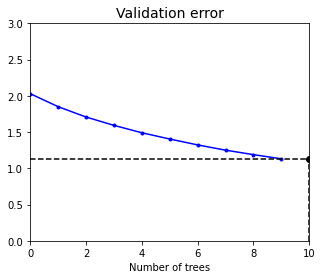

In [53]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 10], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.axis([0, 10, 0, 3])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)
plt.show()

## **XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. See [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/) here.

In [54]:
# import xgboost
try:
    import xgboost 
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Since XGBoost does not directly support multi-classification (you can implement your own customized objective class to achieve this), we use digit 1 and 2 to build a binary data set.

In [55]:
# filter the original data set
indices = np.logical_or(mnist.target == 1, mnist.target == 2)
small_data = mnist.data[indices]
small_label = mnist.target[indices]
# split the filtered data set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    small_data, small_label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42)

In [57]:
if xgboost is not None: 
    xgb = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100,
                              silent=True, objective='binary:logistic', booster='gbtree')
    
    # TODO: Fit the xgb model on training data, get test set predictions, and calculate the test accuracy
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print("Test Accuracy:", accuracy)

Test Accuracy: 0.9949562878278413


What was the test accuracy you received? (Round to the HUNDREDTHS place)

In [58]:
test_acc = 0.99

In [59]:
grader.grade(test_case_id = 'test_case_xgb_test', answer = test_acc)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Early stopping in XGBoost is much easier. There is a parameter called early_stopping_rounds. The model will train until the validation score stops improving. Validation error needs to decrease at least every early_stopping_rounds to continue training. 

In [68]:
if xgboost is not None:  
    xgb = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100,
                              silent=True, objective='binary:logistic', booster='gbtree')
    
    # TODO: Add an early_stopping_rounds value of 2 to xgb.fit()
    xgb.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    
    # TODO: Get predictions on the validation set, calculate validation accuracy
    y_pred = xgb.predict(X_val)
    val_accuracy = accuracy_score(y_pred, y_val)
    print("Validation Accuracy:", val_accuracy)

[0]	validation_0-error:0.026061
Will train until validation_0-error hasn't improved in 2 rounds.
[1]	validation_0-error:0.02396
[2]	validation_0-error:0.020177
[3]	validation_0-error:0.019756
[4]	validation_0-error:0.019336
[5]	validation_0-error:0.018495
[6]	validation_0-error:0.019336
[7]	validation_0-error:0.018495
Stopping. Best iteration:
[5]	validation_0-error:0.018495

Validation Accuracy: 0.9815048339638504


What was the validation accuracy you received? (Round to the HUNDREDTHS place)

In [69]:
val_acc = 0.98

In [70]:
grader.grade(test_case_id = 'test_case_xgb_val', answer = val_acc)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## *Question 4*

What's the difference between AdaBoost, Gradient Boost and XGBoost? To help the autograder, please explicitly discuss each method briefly.

*Hint: Your answer could cover principle, model performance, training time and etc. 

In [71]:
ans = "AdaBoost, Gradient Boost, XGBoost"

In [72]:
grader.grade(test_case_id = 'test_case_conclusion', answer = ans)

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Additional Material

If you are interested in Boosting algorithm, you could read additional material here [LightGBM - Paper](https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf), and [LightGBM - Documentation](https://lightgbm.readthedocs.io/en/latest/). You can also refer to [CatBoost - Paper](https://arxiv.org/abs/1706.09516) and [CatBoost - Documentation](https://catboost.ai/docs/concepts/about.html). Hope you enjoy this worksheet.

## Submitting to the Autograder

First of all, please run your notebook from beginning to end and ensure you are getting all the points from the autograder!

Now go to the File menu and choose "Download .ipynb".  Go to [Gradescope](https://www.gradescope.com/courses/409970) and:

1. From "File" --> Download both .ipynb and .py files
1. Name these files `Boosting_WS.ipynb` and `Boosting_WS.py` respectively
1. Sign in using your Penn email address (if you are a SEAS student we recommend using the Google login) and ensure  your class is "CIS 5200"
1. Select **Worksheet: Boosting**
1. Upload both files
1. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!

You should be set! Note that this assignment has 10 autograded points that will show up upon submission. Points are awarded based on a combination of correctness and sufficient effort. 